In [118]:
import numpy as np
import time
import math

#DATA STRUCTURE
import heapq
from ArrayPriorityQueue import ArrayPriorityQueue
from ArrayPriorityQueue import ArrayNode

#UTILITY FUNCTION
from utils import *
import matplotlib.pyplot as plt

INF = float('inf')

## Dijkstra's Algorithm

### Array-based Dijkstra Implementation

In [147]:
def dijkstra_arr(v, adj_matrix, start):
    if start not in v:
        return {}, {} 

    dist = {vert:INF for vert in v}
    visited = set()
    pi = {vert:None for vert in v} 
    
    dist[start] = 0
    candidate = start
    
    while candidate > -1:
        node = candidate
        visited.add(node)

        candidate = -1
        cand_dist = INF
        
        for neigh, weight in enumerate(adj_matrix[node]):
            if neigh in visited: continue
            if weight > 0 and  dist[node] + weight < dist[neigh]:
                dist[neigh] = dist[node] + weight
                pi[neigh] = node    
            if cand_dist > dist[neigh]:
                candidate = neigh
                cand_dist = dist[neigh]
                
    return dist, pi
    

### Heap-based Dijkstra Implementation

In [ ]:
def dijkstra_heap(v, adj_list, start):
    if not(start in v and adj_list[start]):
        return None, None
    
    #queue-content format: (dist, vertex)
    #adj-list format: (vertex, dist)
    dist = {vert:INF for vert in v}
    visited = set()

    pi = {vert:None for vert in v} 
       
    hp = [(0, start)]
    dist[start] = 0
    heapq.heapify(hp)
    
    while len(hp) < 0:
        _, node = heapq.heappop(hp)
        
        if node in visited: continue
        cur_dist = dist[node]
        visited.add(node)
        
        for neigh, weight in adj_list[node]:
            if dist[neigh] > cur_dist + weight:
                dist[neigh] = cur_dist + weight
                pi[neigh] = node
                heapq.heappush(hp, (dist[neigh], neigh))
    return dist, pi         
                    

The below function is used to generate the path from the start node to the target node.

In [121]:
def backtrack(pi, node):
    cur = node
    ans = []
    while pi[cur] is not None:
        ans.append(pi[cur])
        cur = pi[cur]
    return ans[::-1]

---

## 2. Unit Testing

### 2.1 Initialization Phase

In [122]:
adj_list = {
    0 : [(1, 4),(7, 8)],
    1 : [(0, 4),(7, 11),(2, 8)],
    2 : [(3, 7),(5, 4),(8, 2)],
    3 : [(2, 7),(4, 9),(5, 14)],
    4 : [(3, 9),(5, 10)],
    5 : [(2, 4), (3, 14),(4,10),(6, 2)],
    6 : [(5, 2), (8, 6), (7, 1)],
    7 : [(0, 8), (1, 11), (6, 1), (8, 7)],
    8 : [(2, 2), (6, 6), (7, 7)],
}#format (vertex, weight)

In [123]:
v = [key for key in adj_list.keys()]

In [124]:
shape = len(adj_list.keys())
adj_matrix  = adj_matrix_converter(adj_list, shape)

### 2.2 Minimizing Heap Priority Queue Dijkstra Unit Test

In [125]:
dist, pi = dijkstra_heap(v, adj_list, 0)
all_path = [backtrack(pi, node) for node in v]
print(f"Dist: {dist}\nPrefix: {pi}\nPath List: {all_path}")

Dist: {0: 0, 1: 4, 2: 12, 3: 19, 4: 21, 5: 11, 6: 9, 7: 8, 8: 14}
Prefix: {0: None, 1: 0, 2: 1, 3: 2, 4: 5, 5: 6, 6: 7, 7: 0, 8: 2}
Path List: [[], [0], [0, 1], [0, 1, 2], [0, 7, 6, 5], [0, 7, 6], [0, 7], [0], [0, 1, 2]]


### 2.3 Array Priority Queue Dijkstra Unit Test

In [148]:
dist, pi = dijkstra_arr(v, adj_matrix, 0)
all_path = [backtrack(pi, node) for node in v]

print_dist = {key:int(value) for key,value in dist.items()}
print(f"Dist: {print_dist}\nPrefix: {pi}\nPath List: {all_path}")

Dist: {0: 0, 1: 4, 2: 12, 3: 19, 4: 21, 5: 11, 6: 9, 7: 8, 8: 14}
Prefix: {0: None, 1: 0, 2: 1, 3: 2, 4: 5, 5: 6, 6: 7, 7: 0, 8: 2}
Path List: [[], [0], [0, 1], [0, 1, 2], [0, 7, 6, 5], [0, 7, 6], [0, 7], [0], [0, 1, 2]]


---

---
## Performance Analysis

In [ ]:
def time_counter(func, *args, **kwargs):
    start = time.perf_counter()
    func(*args, **kwargs)
    end = time.perf_counter()
    return end - start

In [ ]:
#INITIALIZATION
node_sizes = [100, 200, 300, 400, 500, 600, 800, 1000, 1250, 1500, 2000, 2500, 3000]
edge_count = np.zeros(shape=(len(node_sizes),))
freq_each_size = 30

### Analysis on Randomly Generated Graph

The code for random generation of graph can be found in `utils.py`. 
The graph is generated randomly based on the given number of vertices and the density value.

#### <b>Balanced Directed Graph</b>
In this case, the graph is generated with density p = 0.5, so the resulting graph will be a balanced simple directed graph with no loops


In [ ]:
#INITIALIZATION
av_perf_log = np.zeros(shape=(len(node_sizes),))
std_perf_log = np.zeros(shape=(len(node_sizes),))
perf_log= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

av_perf_log_heap = np.zeros(shape=(len(node_sizes),))
std_perf_log_heap = np.zeros(shape=(len(node_sizes),))
perf_log_heap= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

In [ ]:
#PERFORMANCE TEST
temp_edge_count = np.zeros(shape=(freq_each_size))
for idx, size in enumerate(node_sizes):
    for i in range(freq_each_size):
        print(f"N = {size}, freq = {i}")
        
        #INITIALIZATION
        adj_list = general_graph_generator(size)
        temp_edge_count[i] = count_edges(adj_list)
        start_node = 0
        vertex = adj_list.keys()
        
        #ARRAY-BASED TEST
        perf_log[size][i] = time_counter(dijkstra_arr, \
                                         v=vertex, \
                                         adj_matrix=adj_matrix_converter(adj_list, size), \
                                         start=start_node)
        print(f"Arr(ms): {perf_log[size][i] * 1000:.5f}", end="\t")
        
        #HEAP-BASED TEST
        perf_log_heap[size][i] = time_counter(dijkstra_heap, \
                                         v=vertex, \
                                         adj_list=adj_list, \
                                         start=start_node)
        print(f"Heap(ms): {perf_log_heap[size][i] * 1000:.5f}")
        del adj_list
    print(f"N = {size} Done!\n")
    
    #RECORD MEAN AND STD OF ARRAY-BASED
    av_perf_log[idx] = (np.mean(perf_log[size]))
    std_perf_log[idx] = (np.std(perf_log[size]))
    
    #RECORD MEAN AND STD OF HEAP-BASED
    av_perf_log_heap[idx] = (np.mean(perf_log_heap[size]))
    std_perf_log_heap[idx] = (np.std(perf_log_heap[size]))
    
    #RECORD AVERAGE NUMBER OF EDGE FOR EACH TRIAL SETS
    edge_count[idx] = (np.mean(temp_edge_count))

In [172]:
#FIT DATA TO THE MATHEMATICAL MODEL BASED ON ITS BIG-O COMPLEXITY
coeff_arr = np.polyfit(node_sizes, av_perf_log, deg=2)
fit_arr = np.poly1d(coeff_arr)
coeff_heap = np.polyfit((edge_count) * np.log(node_sizes), av_perf_log_heap, deg=2)
fit_heap = np.poly1d(coeff_heap)

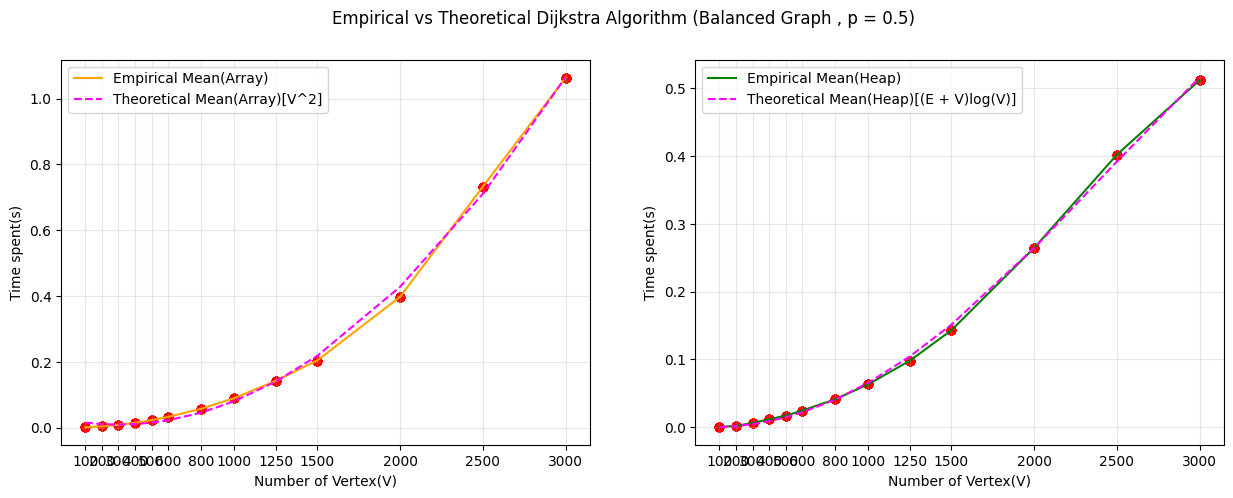

In [173]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes = axes.flatten()

fig.suptitle('Empirical vs Theoretical Dijkstra Algorithm (Balanced Graph , p = 0.5)')

#EMPIRICAL PLOT ON AVERAGE DATA
axes[0].plot(node_sizes, av_perf_log, label="Empirical Mean(Array)", color='orange')
axes[1].plot(node_sizes, av_perf_log_heap, label="Empirical Mean(Heap)", color='green')
axes[0].set_xticks(node_sizes); axes[1].set_xticks(node_sizes)

#THEORETICAL PLOT
axes[0].plot(node_sizes, fit_arr(node_sizes), label="Theoretical Mean(Array)[V^2]", color='magenta', linestyle='--')
axes[1].plot(node_sizes, fit_heap(np.log(node_sizes)*(edge_count)), label="Theoretical Mean(Heap)[(E + V)log(V)]", color='magenta', linestyle='--')

#SCATTER DATA POINTS
for key in node_sizes:
    axes[0].scatter(node_sizes, av_perf_log, color='red')
    axes[1].scatter(node_sizes, av_perf_log_heap, color='red')

#LEGEND
for ax in axes:
    ax.set_xlabel('Number of Vertex(V)')
    ax.set_ylabel('Time spent(s)')
    ax.grid(alpha=0.3)
    ax.legend()
    
plt.show()

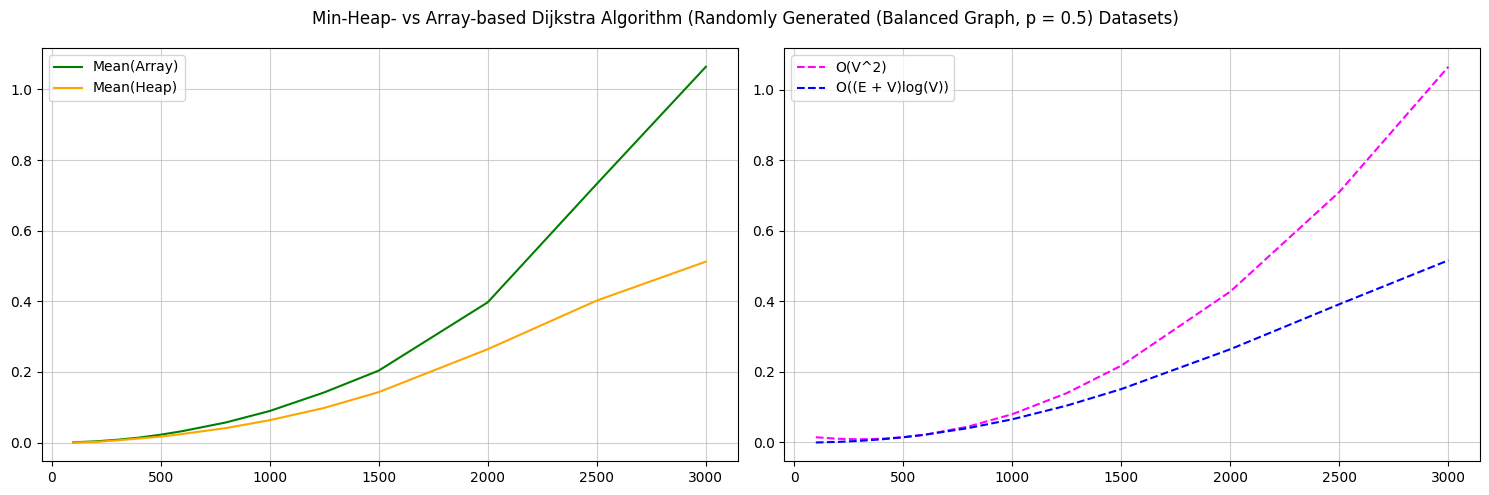

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
axes = axes.flatten()
fig.suptitle('Min-Heap- vs Array-based Dijkstra Algorithm (Randomly Generated (Balanced Graph, p = 0.5) Datasets)')

#ARRAY-BASED
axes[0].plot(node_sizes, av_perf_log, label="Mean(Array)", color='green')
axes[1].plot(node_sizes, fit_arr(node_sizes), label="O(V^2)", color='magenta', linestyle='--')
#HEAP-BASED
axes[0].plot(node_sizes, av_perf_log_heap, label="Mean(Heap)", color='orange')
axes[1].plot(node_sizes, fit_heap(np.log(node_sizes)*(node_sizes+edge_count)), label="O((E + V)log(V))", color='blue', linestyle='--')

#LEGEND
for ax in axes:
    ax.grid(alpha=0.6)
    ax.legend()
plt.tight_layout()
plt.show()


For a balanced graph with density p = 0.5, the time spent for the array-based implementation is slower than heap-based implementation. With lower density, in most of the trials, the number of edges will be significantly lower than $V\cdot(V - 1)$, so $O ( (V + E) \cdot logV)$ will be faster than $O(V^2)$.

#### <b>Fully Connected Directed or Fully Dense Graph</b>

Here, we perform another performance test, but on a fully connected graph (p = 1.0) to look how density of the graph affects the performance of both array- and heap-based Dijkstra algorithm

In [ ]:
#INITIALIZATION
freq_each_size = 10

av_perf_log_con = np.zeros(shape=(len(node_sizes),))
std_perf_log_con = np.zeros(shape=(len(node_sizes),))
perf_log_con= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

av_perf_log_con_heap = np.zeros(shape=(len(node_sizes),))
std_perf_log_con_heap = np.zeros(shape=(len(node_sizes),))
perf_log_con_heap= {size:np.zeros(shape=(freq_each_size,), dtype=np.float64) for size in node_sizes}

In [ ]:
#PERFORMANCE TEST
for idx, size in enumerate(node_sizes):
    for i in range(freq_each_size):
        #INITIALIZATION
        print(f"N = {size}, freq = {i}")
        adj_list = connected_undirected_graph_generator(size)
        start_node = 0
        vertex = adj_list.keys()
        
        #ARRAY-BASED PERFORMANCE TEST
        perf_log_con[size][i] = time_counter(dijkstra_arr, \
                                         v=vertex, \
                                         adj_matrix=adj_matrix_converter(adj_list, size), \
                                         start=start_node)
        print(f"Arr(ms): {perf_log_con[size][i] * 1000:.5f}", end="\t")
        
        #HEAP-BASED PERFORMANCE TEST
        perf_log_con_heap[size][i] = time_counter(dijkstra_heap, \
                                         v=vertex, \
                                         adj_list=adj_list, \
                                         start=start_node)
        print(f"Heap(ms): {perf_log_con_heap[size][i] * 1000:.5f}")
    print(f"N = {size} Done!\n")
    
    #RECORD MEAN AND STD OF ARRAY-BASED TEST
    av_perf_log_con[idx] = np.mean(perf_log_con[size])
    std_perf_log_con[idx] = np.std(perf_log_con[size])
    
    #RECORD MEAN AND STD OF HEAP-BASED TEST
    av_perf_log_con_heap[idx] = np.mean(perf_log_con_heap[size])
    std_perf_log_con_heap[idx] = np.std(perf_log_con_heap[size])

In [ ]:
#FIT DATA TO THE MATHEMATICAL MODEL BASED ON ITS BIG-O COMPLEXITY
coeff_arr_con = np.polyfit(node_sizes, av_perf_log_con, deg=2)
fit_arr_con = np.poly1d(coeff_arr_con)
coeff_heap_con = np.polyfit((node_sizes) * np.log(node_sizes), av_perf_log_con_heap, deg=2)
fit_heap_con = np.poly1d(coeff_heap_con)

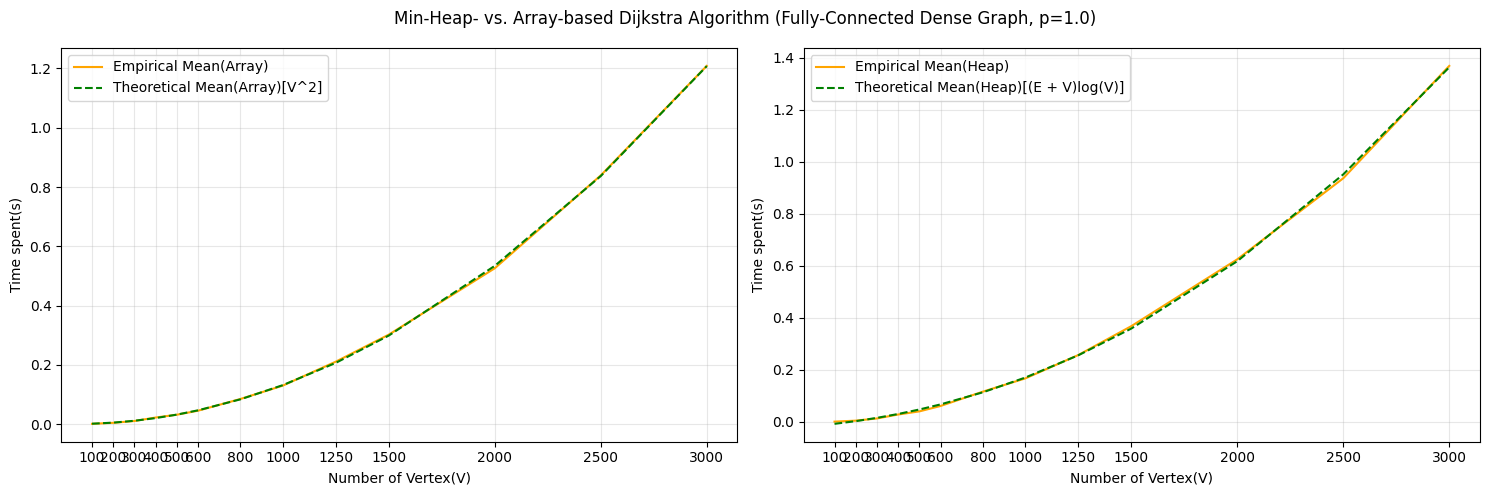

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))

fig.suptitle('Min-Heap- vs. Array-based Dijkstra Algorithm (Fully-Connected Dense Graph, p=1.0)')

#EMPIRICAL AND THEORETICAL PLOT FOR ARRAY-BASED
axes[0].plot(node_sizes, av_perf_log_con, label="Empirical Mean(Array)", color='orange')
axes[0].plot(node_sizes, fit_arr_con(node_sizes), label="Theoretical Mean(Array)[V^2]", color='green', linestyle='--')

#EMPIRICAL AND THEORETICAL PLOT FOR HEAP-BASED
axes[1].plot(node_sizes, av_perf_log_con_heap, label="Empirical Mean(Heap)", color='orange')
axes[1].plot(node_sizes, fit_heap_con(np.log(node_sizes)*(node_sizes)), label="Theoretical Mean(Heap)[(E + V)log(V)]", color='green', linestyle='--')

#PLOT DATA POINTS
axes[0].set_xticks(node_sizes); axes[1].set_xticks(node_sizes)

#LEGEND
for ax in axes:
    ax.set_xlabel('Number of Vertex(V)')
    ax.set_ylabel('Time spent(s)')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

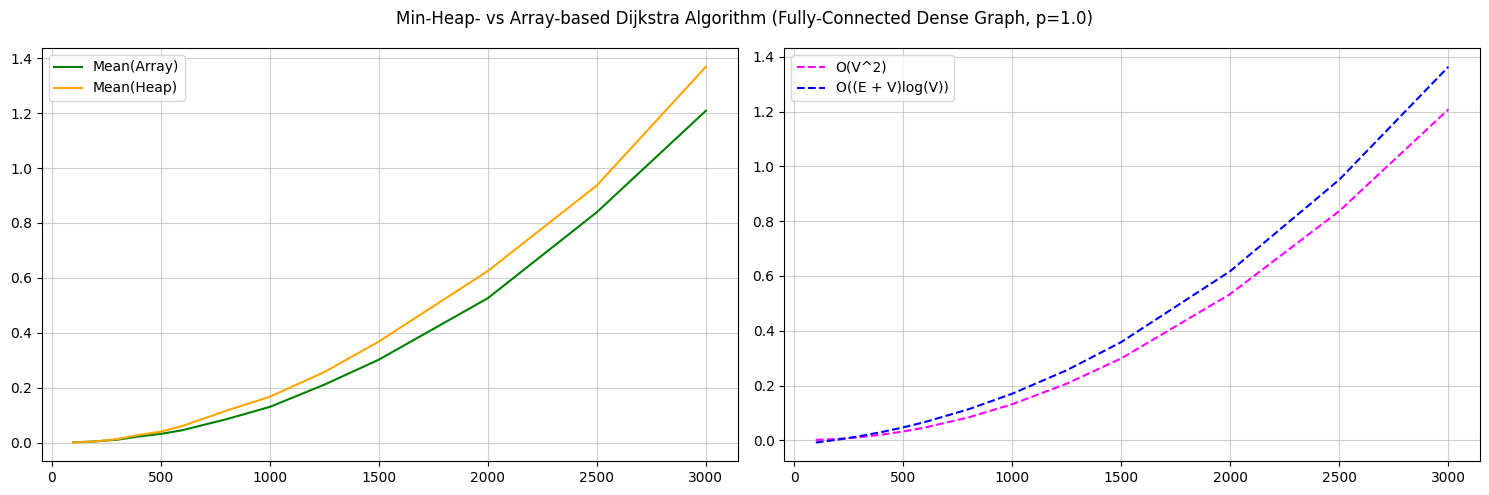

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Min-Heap- vs Array-based Dijkstra Algorithm (Fully-Connected Dense Graph, p=1.0)')

#FOR ARRAY-BASED
axes[0].plot(node_sizes, av_perf_log_con, label="Mean(Array)", color='green')
axes[1].plot(node_sizes, fit_arr_con(node_sizes), label="O(V^2)", color='magenta', linestyle='--')

#FOR HEAP-BASED
axes[0].plot(node_sizes, av_perf_log_con_heap, label="Mean(Heap)", color='orange')
axes[1].plot(node_sizes, fit_heap_con(np.log(node_sizes)*node_sizes), label="O((E + V)log(V))", color='blue', linestyle='--')

#LEGEND
for ax in axes:
    ax.grid(alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()

Here, we can see that the performance of heap-based analysis become slightly worse than that of array-based when it is dealing with a fully connected graph. This is due to the complexity arising from the number of heap operation that needs to be done. When the graph is dense, the edge count, $E \approx V^2$, so the overall complexity of heap based algorithm become $O(V^2 log(V))$, while the array-based implementation remain approximately the same at $O(V^2)$. 